# Analysis of Heart Failure Prediction Dataset  - Data Visualisation Project

Cardiovascular diseases (CVD) are the number 1 cause of death globally, with an estimate of 17.9 million deaths per year. A majority (4 out of 5) of CVD deaths are due to heart attacks and strokes. People with cardiovascular diseases or who are at risk of this diseases require early detection and management to ensure their wellbeing. Hence, this project explores a dataset of people of different ages with 11 features that can be used to predict and identify a possible heart disease. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). We will use Python to analyze the dataset and use the pandas and SciPy libraries to answer the following questions:

1. Are heart diseases more common in male or female?
2. Do heart diseases have a correlation with age?
3. What type of chest pains occur more if a heart disease is present?
4. Does cholesterol and blood pressure play a role in heart diseases?
5. Is exercise angina related to blood pressure?
6. Is there a correlation between blood sugar and cholesterol levels?

### Import Libraries

In [212]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 

heart_data = pd.read_csv('heart.csv')

### Load and Inspect Data

In [213]:
heart_data.info()
heart_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,No,0.0,Up,No
1,49,F,NAP,160,18.0,0,Normal,156,No,1.0,Flat,Yes
2,37,M,ATA,130,283.0,0,ST,98,No,0.0,Up,No
3,48,F,ASY,138,214.0,0,Normal,108,Yes,1.5,Flat,Yes
4,54,M,NAP,150,195.0,0,Normal,122,No,0.0,Up,No
5,39,M,NAP,120,339.0,0,Normal,170,No,0.0,Up,No
6,45,F,ATA,130,237.0,0,Normal,170,No,0.0,Up,No
7,54,M,ATA,110,28.0,0,Normal,142,No,0.0,Up,No
8,37,M,ASY,140,27.0,0,Normal,130,Yes,1.5,Flat,Yes
9,48,F,ATA,120,284.0,0,Normal,120,No,0.0,Up,No


The dataset contains 918 rows and 12 columns containing information on different attributes of an individual.
Here's a quick summary of the columns:

- **Age**: Age of the patient [years]
- **Sex**: Sex of the patient [M: Male, F: Female]
- **ChestPainType**: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: Resting blood pressure [mm Hg]
- **Cholesterol**: Serum cholesterol [mm/dl]
- **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: Maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: Exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: Oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: Output class

### Data Cleaning and Preparation

In [214]:
# Cleaning data
def clean_df_text(df):
    # clean the column name texts
    df.columns = df.columns.str.strip()

    # clean the row value texts
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.title()
            df[column] = df[column].str.strip()

    return df

# To add value labels on graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [215]:
heart = clean_df_text(heart_data)

## Data Question 1: Are heart diseases more common in male or female?

In [216]:
# Initial count for heart disease
disease = heart.HeartDisease.value_counts().rename_axis('Heart_Disease').reset_index(name='Count')
disease

,Heart_Disease,Count
0,Yes,508
1,No,410


In [217]:
# Plotting graph for male and female with heart disease
with_disease = [0,0] 
without_disease = [0,0]

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'No':
        if heart.Sex[i] == 'M':
            without_disease[0] += 1
        else:
            without_disease[1] += 1
    else:
        if heart.Sex[i] == 'M':
            with_disease[0] += 1
        else:
            with_disease[1] += 1

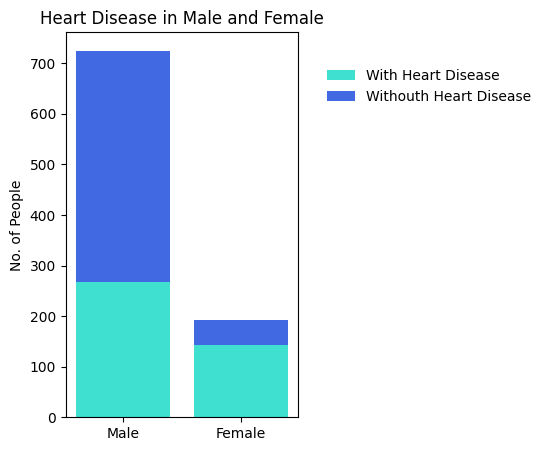

In [218]:
plt.figure(figsize = (3,5))
plt.bar(x = ['Male', 'Female'], height = without_disease, color = 'turquoise')
plt.bar(x = ['Male', 'Female'], bottom = without_disease, height = with_disease, color = 'royalblue')
plt.title('Heart Disease in Male and Female')
# addlabels(['Male', 'Female'], without_disease)
plt.ylabel('No. of People')
plt.legend(['With Heart Disease', 'Withouth Heart Disease'], loc = (1.1,0.8), frameon = False)
plt.show()

There are approximately 715 males and 195 females in this data. The graph above shows the proportions of male and females with or without heart diseases. The proportion of men without heart diseases is greater than with heart diseases with a ratio of approximately 1.5:1. For the females, there is a higher propotion of women with heart diseases than without. Approximately 80% of the females in this dataset have heart diseases. However, the sample size for women was much smaller than the men in this data so this could be inaccurate. 

## Data Question 2: Do heart diseases have a correlation with age?

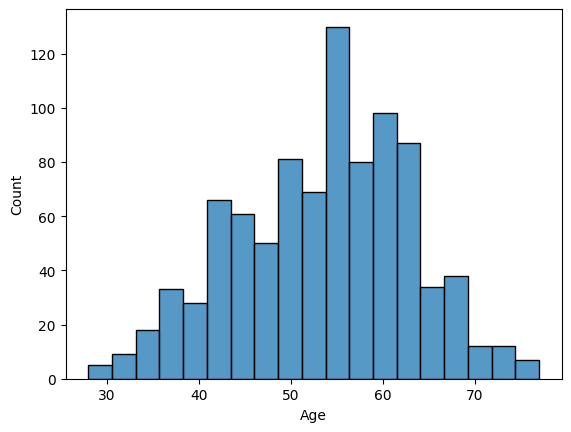

In [219]:
# Finding distribution of age in data 
age = sns.histplot(data = heart , x = 'Age', fill = True)
plt.show()

This graph shows the distribution of age in the dataset. It seems that majority of the people are in the age group of 50 to 60 years old. The youngest and oldest person in the data is approximately 25 and 85 years old respectively. 

In [220]:
# Creating age groups 
bins = [29,39,49,59,69,79]
heart['binned_age'] = pd.cut(heart.Age, bins, labels = ['30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79'])
heartdisease_df = heart[heart.HeartDisease == 'Yes']
heartdisease = heart.binned_age.value_counts().rename_axis('Age Group').reset_index(name = 'Count')

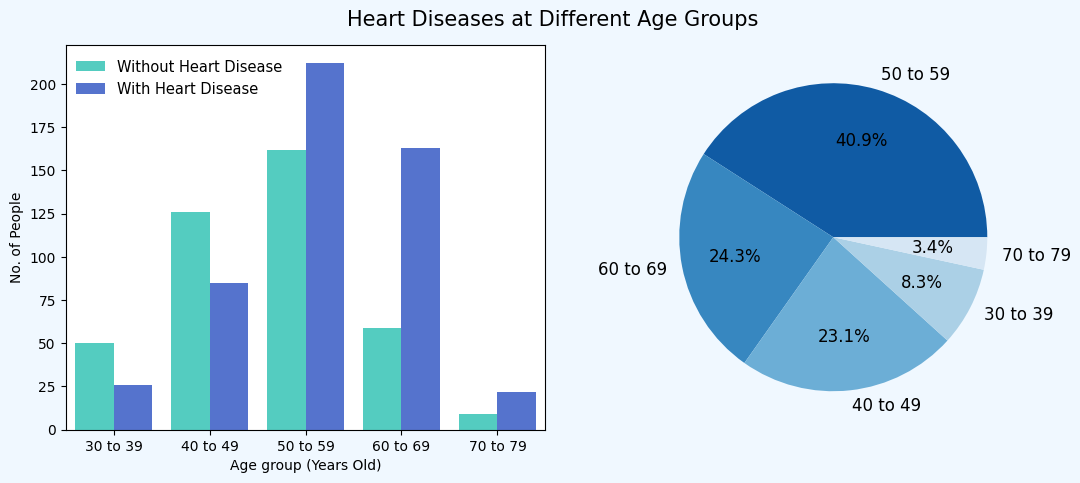

In [221]:
# Plotting bar graph
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 5))
plt.subplots_adjust(wspace = 0.1)
plt.suptitle('Heart Diseases at Different Age Groups', fontsize = 15, y = 0.95)

plt.subplot(1,2,1)
sns.countplot(x = heart.binned_age, hue = heart.HeartDisease, palette = ['turquoise', 'royalblue'])
plt.xlabel('Age group (Years Old)')
plt.ylabel('No. of People')
# plt.title('Heart Diseases at Different Age Groups')
plt.legend(['Without Heart Disease', 'With Heart Disease'], frameon = False, loc = (0.01,0.85), fontsize = 10.5)

plt.subplot(1,2,2)
plt.pie(x = heartdisease.Count, labels = heartdisease['Age Group'], autopct = '%1.1f%%',
        colors = sns.color_palette("Blues_r", 5), textprops = {'fontsize' : 12}, pctdistance = 0.65)
plt.show()

From the graph, it seems that heart disease tends to increase with age, up to 60 years old. After that, the number of patients with heart disease decreases. The age group with the most heart diseases are people in their 50s, approximately 40% of heart disease patients. 

According to the graph, the risk of heart disease increases with age. As expected, 30 to 39 year olds have the lowest proportion of people with heart disease, approximately 30%. For 40 to 49 year olds, the percentage of people with heart disease is approximately 40%. After the age of 50, the risk of a heart disease increases even more as the propotion of people with heart disease becomes greater than 50%. From 60 to 79 years old, an estimate of 70% to 80% of people in this age group have heart disease. 

## Data Question 3: What type of chest pains occur more if a heart disease is present?

In [222]:
# Inital chest pain count
chest_pain = heart.ChestPainType.value_counts().rename_axis('Chest_Pain').reset_index(name='Count')
chest_pain

,Chest_Pain,Count
0,Asy,496
1,Nap,203
2,Ata,173
3,Ta,46


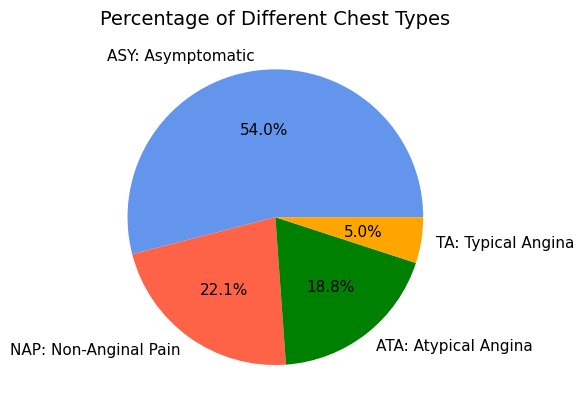

In [223]:
# Plotting pie chart
pain_type = ['ASY: Asymptomatic', 'NAP: Non-Anginal Pain', 'ATA: Atypical Angina', 'TA: Typical Angina']

plt.pie(x = chest_pain.Count, labels = pain_type, autopct='%1.1f%%', colors = ['cornflowerblue', 'tomato', 'green', 'orange'], textprops={'fontsize': 11})
# plt.legend(pain_type, loc = 'right', bbox_to_anchor = (1.7,0.5))
plt.title('Percentage of Different Chest Types', fontsize = 14)
plt.show()

For this dataset, asymptomatic chest pains seem to be the most common overall accounting for 54%, followed by non-anginal pain with 22.1%. Next is atypical angina and typical angina with 18.8% and 5% respectively. 

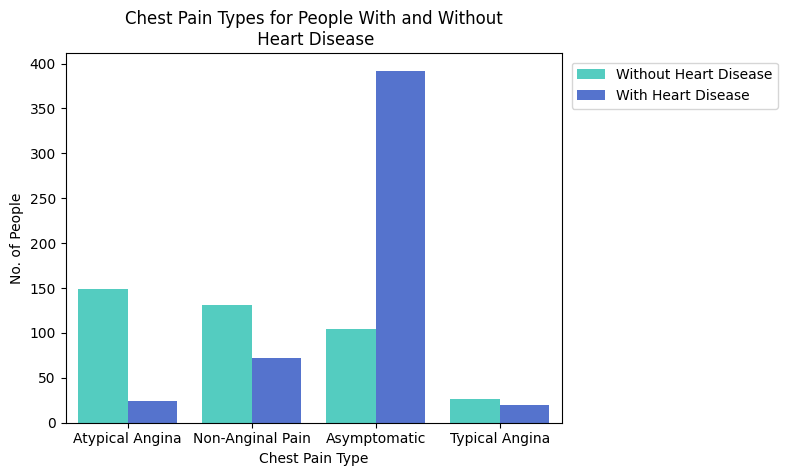

In [224]:
ax= sns.countplot(data = heart, x = 'ChestPainType', hue = 'HeartDisease', palette = ['turquoise', 'royalblue'])
plt.legend(['Without Heart Disease', 'With Heart Disease'], loc = [1.02,0.85])
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of People')
ax.set_xticklabels(labels = ['Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic', 'Typical Angina'])
plt.title('Chest Pain Types for People With and Without\n Heart Disease')
plt.show()

According to the graph above, it is clear that asymptomatic chest pains occur the most frequently in heart disease patients with approximately 390 people. The other types of chest pain are much less common compared to asymptomatic, only occuring in approximatelty 20 to 80 people. For people without heart disease, the most common chest pain is atypical angina with approximately 150 people, followed by non-anginal pain of 130 people. Asymptomatic chest pains are less common with approximately 100 people and lastly, typical angina with only 30 people. 

## Data Question 4: Does cholesterol and blood pressure play a role in heart diseases?

In [225]:
# Finding cholesterol in heart disease
cholesterol_level = [0,0,0]
cholesterol_level_with_disease = [0,0,0]

for i in range(0, len(heart)):
    if heart.Cholesterol[i] < 200:
        cholesterol_level[0] += 1
    elif heart.Cholesterol[i] >= 200 and heart.Cholesterol[i] < 240:
        cholesterol_level[1] += 1
    else:
        cholesterol_level[2] += 1

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'No':
        continue
    else: 
        if heart.Cholesterol[i] < 200:
            cholesterol_level_with_disease[0] += 1
        elif heart.Cholesterol[i] >= 200 and heart.Cholesterol[i] < 240:
            cholesterol_level_with_disease[1] += 1
        elif heart.Cholesterol[i] >= 240:
            cholesterol_level_with_disease[2] += 1

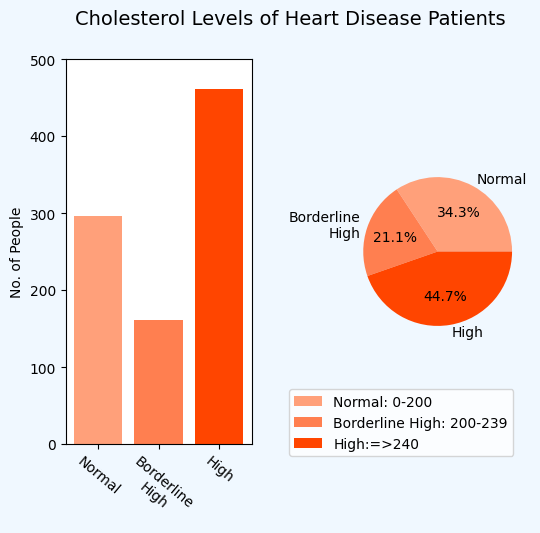

In [226]:
# Plotting chart
cholesterol_labels = ['Normal', 'Borderline\nHigh', 'High']

fig = plt.figure(facecolor = 'aliceblue', figsize = (6, 5))
plt.suptitle("Cholesterol Levels of Heart Disease Patients", fontsize = 14)
plt.subplots_adjust(wspace=0.5,hspace=0.9)

plt.subplot(1,2,1)
plt.bar(x = cholesterol_labels, height = cholesterol_level, color = ['lightsalmon', 'coral', 'orangered'])
plt.ylabel('No. of People')
plt.ylim((0,500))
plt.xticks(rotation = -40)

plt.subplot(1,2,2)
plt.pie(x = cholesterol_level_with_disease, labels = cholesterol_labels, autopct='%1.1f%%', colors = ['lightsalmon', 'coral', 'orangered'])
plt.xticks(rotation = -45)
plt.legend(['Normal: 0-200','Borderline High: 200-239', 'High:=>240'],loc = (-0.3,-0.6))
plt.show()

The graph clearly chows that heart disease patients have a tendency to have high cholesterol. There are approximately 460 heart disease patients who have high cholesterol in this dataset which accounts for 44.7% of patients. There is an estimate of 300 heart disease patients who have normal cholesterol and 160 people with borderline high cholesterol.

In [227]:
# Finding BP levels in heart disease patients
bp_level = [0,0,0]
bp_level_with_disease = [0,0,0]
bp_label = ['Normal', 'Pre-hypertension', 'Hypertension']

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'No':
        continue
    else: 
        if heart.RestingBP[i] < 120:
            bp_level_with_disease[0] += 1
        elif heart.RestingBP[i] >= 120 and heart.RestingBP[i] < 140:
            bp_level_with_disease[1] += 1
        elif heart.RestingBP[i] >= 140:
            bp_level_with_disease[2] += 1

for i in range(0, len(heart)):
    if heart.RestingBP[i] < 120:
        bp_level[0] += 1
    elif heart.RestingBP[i] >= 120 and heart.RestingBP[i] < 140:
        bp_level[1] += 1
    else:
        bp_level[2] += 1

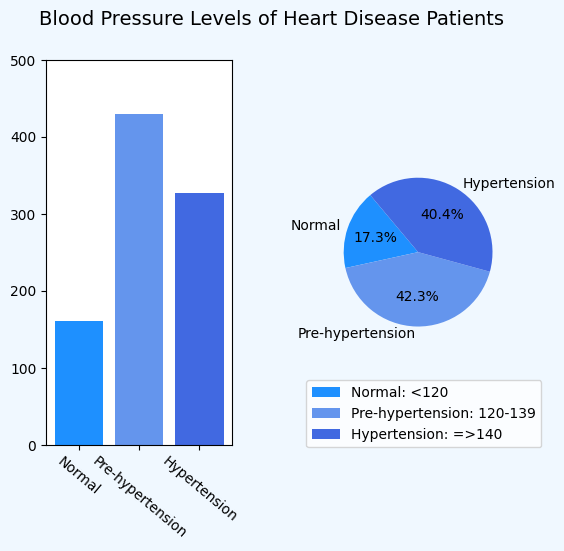

In [228]:
# Plotting chart 
fig = plt.figure(facecolor = 'aliceblue', figsize = (6, 5))
plt.suptitle("Blood Pressure Levels of Heart Disease Patients", fontsize = 14)
plt.subplots_adjust(wspace=0.5,hspace=0.9)

plt.subplot(1,2,1)
plt.bar(x = bp_label, height = bp_level, color = ['dodgerblue', 'cornflowerblue', 'royalblue'])
plt.xticks(rotation = -40)
plt.ylim((0,500))

plt.subplot(1,2,2)
plt.pie(x = bp_level_with_disease, labels = bp_label, startangle = 130, autopct='%1.1f%%', colors = ['dodgerblue', 'cornflowerblue', 'royalblue'])
plt.xticks(rotation = -45)
plt.legend(['Normal: <120','Pre-hypertension: 120-139', 'Hypertension: =>140'], loc = (-0.1,-0.55))
plt.show()

Heart disease patients tend to have pre-hypertension and high blood pressure. From this dataset, approximately 430 people have pre-hypertension blood pressure which accounts for 42.3% of all patients. 40.4% of patients also have hypertension, approximately 320 people. Lastly, a small percentage (17.3%) of heart disease patients have normal blood pressure, an estimate 170 people. 

In [229]:
# Finding patients with high cholesterol and BP levels
bp_cholesterol_disease = [0,0]

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'Yes':
        if heart.RestingBP[i] >= 120 and heart.Cholesterol[i] >= 200:
            bp_cholesterol_disease[0] += 1
        elif heart.RestingBP[i] <120 and heart.Cholesterol[i] < 200:
            bp_cholesterol_disease[1] += 1

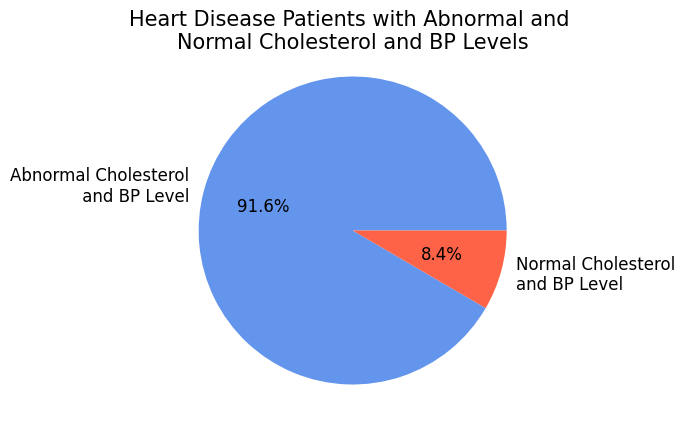

In [230]:
# Plotting pie chart 
x_label = ['Abnormal Cholesterol\n and BP Level', 'Normal Cholesterol\nand BP Level']

fig = plt.figure(figsize = (5,5))
plt.pie(x = bp_cholesterol_disease, labels = x_label, autopct = '%1.1f%%', colors = ['cornflowerblue', 'tomato'], textprops={'fontsize': 12})
plt.title("Heart Disease Patients with Abnormal and \nNormal Cholesterol and BP Levels", y = 0.95, fontsize =15)
plt.show()

In this case, abnormal means above normal levels. The graph shows that 91.6% of patients with heart disease have abnormal cholesterol and blood pressure levels. This indicates that cholesterol and blood pressure are correlated to heart disease.

## Data Question 5: Is exercise angina related to blood presure in heart disease patients?

In [231]:
# Initial exercise angina count
exercise_angina = heart.ExerciseAngina.value_counts().rename_axis('Exercise_Angina').reset_index(name='Count')
exercise_angina

,Exercise_Angina,Count
0,No,547
1,Yes,371


In [232]:
# Finding exercise angina 
angina_disease = [0,0]
angina_without_disease = [0,0]

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'Yes':
        if heart.ExerciseAngina[i] == 'Yes':
            angina_disease[0] += 1
        elif heart.ExerciseAngina[i] == 'No':
            angina_disease[1] += 1
    elif heart.HeartDisease[i] == 'No':
        if heart.ExerciseAngina[i] == 'Yes':
            angina_without_disease[0] += 1
        elif heart.ExerciseAngina[i] == 'No':
            angina_without_disease[1] += 1

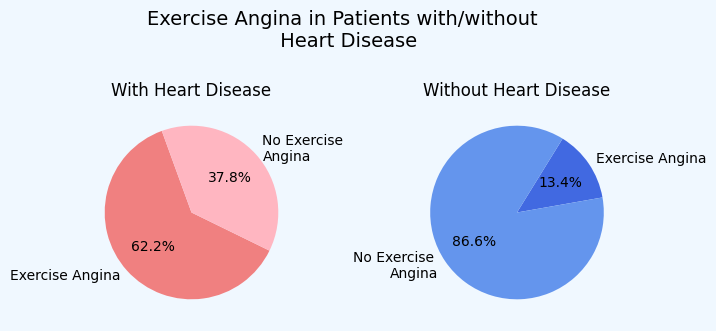

In [233]:
# Plotting pie chart for exercise angina
fig = plt.figure(facecolor = 'aliceblue', figsize = (7, 5))
plt.suptitle("Exercise Angina in Patients with/without \n Heart Disease", fontsize = 14, y=0.9)
plt.subplots_adjust(wspace=0.5,hspace=1)

plt.subplot(1,2,1)
plt.pie(x = angina_disease, labels = ['Exercise Angina', 'No Exercise\nAngina'], startangle =110, autopct ='%1.1f%%', colors = ['lightcoral', 'lightpink'])
plt.title('With Heart Disease')

plt.subplot(1,2,2)
plt.pie(x = angina_without_disease, labels = ['Exercise Angina', 'No Exercise \nAngina'], autopct ='%1.1f%%', startangle =10, colors = ['royalblue','cornflowerblue'])
plt.title('Without Heart Disease')

plt.show()

The figure shows that exercise angina is more common in people with heart disease, about 62.2%. A bigger majority of people without heart disease do not have exercise angina (about 86.6%) compared to 13.4% with exercise angina. 

In [234]:
bp_angina = [0,0,0]

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'Yes' and heart.ExerciseAngina[i] == 'Yes':
        if heart.RestingBP[i] < 120:
            bp_angina[0] += 1
        elif heart.RestingBP[i] >= 120 and heart.RestingBP[i] < 140:
            bp_angina[1] += 1
        elif heart.RestingBP[i] >= 140:
            bp_angina[2] += 1

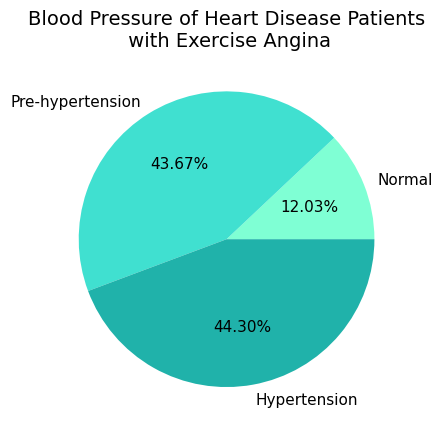

In [235]:
# Plotting pie chart
plt.pie(x = bp_angina, labels = bp_label, autopct = '%1.2f%%', textprops={'fontsize': 11}, colors = ['aquamarine','turquoise','lightseagreen'])
plt.title('Blood Pressure of Heart Disease Patients\n with Exercise Angina', fontsize = 14)
plt.show()

The blood pressure of heart disease patients with exercise angina tend to be abnormal, consisting of 87.9% of patients. 44.3% of patients have hypertension and 43.67% of patients have pre-hypertension. This potentially shows that blood pressure is correlated to exercise angina. 

## Data Question 6: Is there a correlation between blood sugar and cholesterol levels?

In [236]:
# Initial blood sugar count
blood_sugar = heart.FastingBS.value_counts().rename_axis('Blood_Sugar').reset_index(name='Count')
blood_sugar

,Blood_Sugar,Count
0,0,704
1,1,214


In [237]:
# 
sugar = [0,0,0]

for i in range(0, len(heart)):
    if heart.HeartDisease[i] == 'Yes' and heart.FastingBS[i] == 1:
        if heart.Cholesterol[i] < 200:
            sugar[0] += 1
        elif heart.Cholesterol[i] >= 200 and heart.Cholesterol[i] < 240:
            sugar[1] += 1
        else:
            sugar[2] += 1

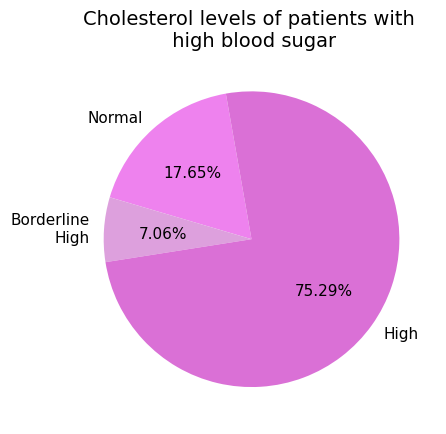

In [238]:
# Plotting pie chart 
plt.pie(x = sugar, labels = cholesterol_labels, autopct = '%1.2f%%', startangle = 100, textprops = {'fontsize':11}, colors = ['violet', 'plum', 'orchid'])
plt.title('Cholesterol levels of patients with \n high blood sugar', fontsize = 14)
plt.show()

Heart disease patients with high blood sugar are also at a higher risk of having high cholesterol. According to the graph, 82.35% of patients have abnormal cholesterol levels, with 75.29% having high cholesterol and 7.06% having borderline high cholesterol. 

## Conclusion

This project was to identify possible trends in heart disease patients to help detect and predict the possibility of a heart disease in the general population. This dataset was the combination of 5 different datasets that were independent from different sources. From this data, it was found that age is a prominent factor in the risk of a having a heart disease. It was shown that people with heart diseases increases as age increase from 30 to 80 years old. It was also found that most heart disease patients experience asymptomatic chest pains in comparison to non-anginal, atypical angina and typical angina pain. Blood pressure and cholesterol also played a role in heart disease patients with over 65% of patients had abnormal cholesterol levels and over 80% of patients had abnormal blood pressure. In addition to that, over 90% of heart disease patients had both abnormal cholesterol and blood pressure levels. Exercise angina was determined to be common in heart disease patients with over 60% of patients and lastly, it was found that 82% of patients with high blood sugar also had abnormal blood pressure levels, showing that cholesterol levels and blood sugar were closely tied together. 